<a href="https://colab.research.google.com/github/baut-jc/DDDS-My-Projects/blob/main/Capstone/Capstone_EVBusinesses_V04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Albuquerque Business Registration Data Analysis

This notebook analyzes business registration data for Albuquerque, focusing on:
- Business types
- Operational durations
- Geographic distribution (ZIP codes)
- Trends from 2010–2025

## Problem Definition

**Business Problem:**  
Understand trends in Albuquerque's business landscape to inform economic planning and potential EV charging station placement.

**Data Science Problem:**  
Clean and transform raw business registration data into a structured dataset for analysis by:
- Calculating business duration (Original Issue Date → Expiration Date)
- Analyzing business type distributions
- Mapping by ZIP code
- Exploring time trends (2010–2025)


## Data Import

In [1]:
!curl -O https://data.cabq.gov/business/busregistration/BusinessRegistrationCABQ-en-us.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61.1M  100 61.1M    0     0  2759k      0  0:00:22  0:00:22 --:--:-- 2613k


In [2]:
!ls -la BusinessRegistrationCABQ-en-us.csv

-rw-r--r-- 1 root root 64145312 Aug  1 22:03 BusinessRegistrationCABQ-en-us.csv


In [3]:
!head BusinessRegistrationCABQ-en-us.csv

��R E G I S T R A T I O N N U M 	 T Y P E 	 T Y P E A B B R E V I A T I O N 	 S T A T U S 	 E F F E C T I V E S T A T U S 	 O W N E D B Y 	 L E G A L N A M E 	 D O I N G B U S I N E S S A S 	 B U S I N E S S D E S C R I P T I O N 	 C O N T A C T N A M E 	 P R I M A R Y P H O N E 	 B U S I N E S S L O C A T I O N 	 S T R E E T _ N U M B E R 	 S T R E E T _ N A M E 	 S T R E E T _ D I R E C T I O N 	 S T R E E T _ T Y P E 	 P O S T _ D I R E C T I O N 	 C I T Y 	 S T A T E 	 Z I P 	 O R I G N A L I S S U E D A T E 	 M O S T R E C E N T I S S U E D A T E 	 E X P I R A T I O N D A T E 	 N A I C S C O D E 	 N A I C S C O D E S E C T O R 	 F I L E E X P O R T D A T E 
 
 " 	 M a r l y n   S a n c h e z 	 C   &   I   S e r v i c e s   	 c l e a n i n g   a n d   h a n d y m a n   s e r v i c e s   	 M a r l y n   S a n c h e z 	 5 0 5 6 5 9 9 8 1 5 	 1 2 8 6   S u n s e t   R d   N W   	   	   	   	   	   	   	   	   	 1 0 / 2 7 / 2 0 1 6 	 1 0 / 2 7 / 2 0 1 6 	 1 0 / 2 6 / 2 0 1 7 	 8 1 	 O 

In [4]:
import pandas as pd
import numpy as np
import re

In [5]:
# Load raw dataset
df = pd.read_csv('BusinessRegistrationCABQ-en-us.csv', encoding='UTF-16', sep='\t', dtype='str')

# Preview ------> 108550, 26
df.shape, df.head(3)


((108550, 26),
    REGISTRATIONNUM                              TYPE TYPEABBREVIATION  \
 0   HB-2016-342041                     Home Business               HB   
 1  COM-2017-346269                        Commercial              COM   
 2  BRC-2005-299007  Business Registration Conversion              BRC   
 
     STATUS EFFECTIVESTATUS                         OWNEDBY  \
 0   Closed          Closed             Marlyn Sanchez \r\n   
 1   Closed          Closed  VJ'S TIRES AND WHEELS LLC \r\n   
 2  Expired         Expired    GRANCOR ENTERPRISES INC \r\n   
 
                    LEGALNAME            DOINGBUSINESSAS  \
 0             Marlyn Sanchez            C & I Services    
 1  VJ'S TIRES AND WHEELS LLC  VJ'S TIRES AND WHEELS LLC   
 2    GRANCOR ENTERPRISES INC    GRANCOR ENTERPRISES INC   
 
                BUSINESSDESCRIPTION              CONTACTNAME  ...  \
 0  cleaning and handyman services            Marlyn Sanchez  ...   
 1                              NaN         ROSALIA O

## Initial Exploration

We will check the structure of the dataset, including data types and missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 0 to 108549
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   REGISTRATIONNUM      108550 non-null  object
 1   TYPE                 108550 non-null  object
 2   TYPEABBREVIATION     108550 non-null  object
 3   STATUS               108550 non-null  object
 4   EFFECTIVESTATUS      108550 non-null  object
 5   OWNEDBY              108536 non-null  object
 6   LEGALNAME            108550 non-null  object
 7   DOINGBUSINESSAS      96630 non-null   object
 8   BUSINESSDESCRIPTION  77879 non-null   object
 9   CONTACTNAME          108550 non-null  object
 10  PRIMARYPHONE         108546 non-null  object
 11  BUSINESSLOCATION     108550 non-null  object
 12  STREET_NUMBER        108550 non-null  object
 13  STREET_NAME          108550 non-null  object
 14  STREET_DIRECTION     108550 non-null  object
 15  STREET_TYPE          108550 non-nu

## Data Cleaning

We will:
1. Select only the necessary columns for our analysis.
2. Extract ZIP codes from `BUSINESSLOCATION`.


In [7]:
# Select relevant columns
columns_needed = ['TYPE', 'TYPEABBREVIATION', 'ORIGNALISSUEDATE', 'EXPIRATIONDATE', 'BUSINESSLOCATION']
df_clean = df[columns_needed].copy()

# Extract ZIP codes using regex
df_clean['ZIP'] = df_clean['BUSINESSLOCATION'].str.extract(r'(\d{5})')

df_clean.head()

,TYPE,TYPEABBREVIATION,ORIGNALISSUEDATE,EXPIRATIONDATE,BUSINESSLOCATION,ZIP
0,Home Business,HB,10/27/2016,10/26/2017,1286 Sunset Rd NW,NaN
1,Commercial,COM,08/21/2017,08/20/2018,501 OLD COORS RD SW,NaN
2,Business Registration Conversion,BRC,01/01/2016,11/30/2022,2121 MENAUL BLVD NE,NaN
3,Home Business,HB,05/26/2017,05/25/2018,1765 CELINA RD SE RIO RANCHO NM 87124,87124
4,Commercial,COM,05/26/2017,05/25/2019,3248 ISLETA BLVD SW,NaN


In [8]:
# Convert to datetime
df_clean['ORIGNALISSUEDATE'] = pd.to_datetime(df_clean['ORIGNALISSUEDATE'], errors='coerce')
df_clean['EXPIRATIONDATE'] = pd.to_datetime(df_clean['EXPIRATIONDATE'], errors='coerce')

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 0 to 108549
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TYPE              108550 non-null  object        
 1   TYPEABBREVIATION  108550 non-null  object        
 2   ORIGNALISSUEDATE  108550 non-null  datetime64[ns]
 3   EXPIRATIONDATE    108549 non-null  datetime64[ns]
 4   BUSINESSLOCATION  108550 non-null  object        
 5   ZIP               73275 non-null   object        
dtypes: datetime64[ns](2), object(4)
memory usage: 5.0+ MB


## Feature Engineering

In [ ]:
# Calculate duration in fractional years
df_clean['DURATION_YEARS'] = (df_clean['EXPIRATIONDATE'] - df_clean['ORIGNALISSUEDATE']).dt.days / 365.25

df_clean.head()


,TYPE,TYPEABBREVIATION,ORIGNALISSUEDATE,EXPIRATIONDATE,BUSINESSLOCATION,ZIP,DURATION_YEARS
0,Home Business,HB,2016-10-27,2017-10-26,1286 Sunset Rd NW,NaN,0.996578
1,Commercial,COM,2017-08-21,2018-08-20,501 OLD COORS RD SW,NaN,0.996578
2,Business Registration Conversion,BRC,2016-01-01,2022-11-30,2121 MENAUL BLVD NE,NaN,6.913073
3,Home Business,HB,2017-05-26,2018-05-25,1765 CELINA RD SE RIO RANCHO NM 87124,87124,0.996578
4,Commercial,COM,2017-05-26,2019-05-25,3248 ISLETA BLVD SW,NaN,1.995893


## Filter for 2010–2025

In [9]:

df_filtered = df_clean[
    (df_clean['ORIGNALISSUEDATE'].dt.year >= 2010) &
    (df_clean['ORIGNALISSUEDATE'].dt.year <= 2025)
].copy()

df_filtered.shape


(77947, 6)

In [14]:
# List of Albuquerque ZIP codes
ABQ_zips = [
    87101, 87102, 87103, 87104, 87105, 87106, 87107, 87108, 87109, 87110,
    87111, 87112, 87113, 87114, 87115, 87116, 87119, 87120, 87121, 87122,
    87123, 87124, 87131, 87151, 87153, 87154, 87158, 87176, 87181, 87184,
    87185, 87187, 87190, 87191, 87192, 87193, 87194, 87195, 87196, 87197,
    87198, 87199
]

# Keep only rows where ZIP is in Albuquerque list
df_filtered = df_filtered[df_filtered['ZIP'].astype(str).isin(map(str, ABQ_zips))]

df_filtered['ZIP'].value_counts()

,count
ZIP,
87110,3492
87109,2786
87107,2415
87120,2324
87108,2276
87102,2123
87105,2080
87121,1933
87111,1821


In [16]:
# Expand data so each active year is counted
expanded_rows = []

for _, row in df_filtered.iterrows():
    start_year = row['ORIGNALISSUEDATE'].year
    end_year = row['EXPIRATIONDATE'].year if pd.notnull(row['EXPIRATIONDATE']) else 2025
    for year in range(start_year, end_year + 1):
        expanded_rows.append({
            'TYPE': row['TYPE'],
            'TYPEABBREVIATION': row['TYPEABBREVIATION'],
            'ZIP': row['ZIP'],
            'YEAR': year
        })

df_expanded = pd.DataFrame(expanded_rows)

## Analysis - Count by Business Type

In [10]:
type_counts = df_filtered.groupby('TYPE').size().sort_values(ascending=False)
type_counts.head(10)


,0
TYPE,
Business Registration Conversion,35824
Home Business,21047
Commercial,20122
Temporary Registration,732
Cannabis Retail,222


## Analysis - Count by ZIP

In [11]:

zip_counts = df_filtered.groupby('ZIP').size().sort_values(ascending=False)
zip_counts.head(10)


,0
ZIP,
87110,3492
87109,2786
87107,2415
87120,2324
87108,2276
87102,2123
87105,2080
87121,1933
87111,1821


## Visualizations
We will create:
1. A bar plot of the top business types.
2. A bar plot of the top ZIP codes.
3. A heatmap showing counts by business type abbreviation and ZIP.

## Fractional Years Analysis (2010–2025)

This section analyzes **business duration** (`DURATION_YEARS`) using fractional years, focusing on:
1. **By Business Type** – Which sectors last longest and are most common.
2. **By ZIP Code** – Where business stability is geographically concentrated.
3. **By Year** – How business longevity changes over time.

The analysis is **filtered to Albuquerque ZIP codes** and the **2010–2025** window, counting businesses if any part of their operational span overlaps this period.


In [21]:
df_clean['DURATION_YEARS'] = (df_clean['EXPIRATIONDATE'] - df_clean['ORIGNALISSUEDATE']).dt.days / 365.25

In [23]:
start_year = 2010
end_year = 2025

df_window = df_clean[
    (df_clean['ORIGNALISSUEDATE'].dt.year <= end_year) &  # started before or during 2025
    (df_clean['EXPIRATIONDATE'].dt.year >= start_year)     # expired after or during 2010
].copy()

In [24]:
avg_duration_by_type = (
    df_window.groupby('TYPEABBREVIATION')['DURATION_YEARS']
    .mean()
    .sort_values(ascending=False)
)


Shows the distribution of fractional years for each type.


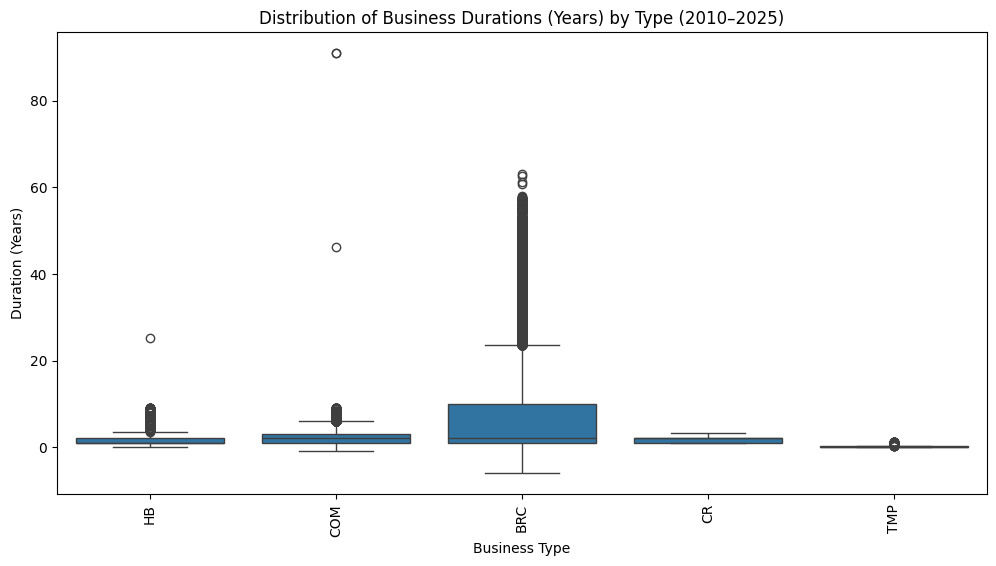

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_window, x='TYPEABBREVIATION', y='DURATION_YEARS')
plt.xticks(rotation=90)
plt.title('Distribution of Business Durations (Years) by Type (2010–2025)')
plt.xlabel('Business Type')
plt.ylabel('Duration (Years)')
plt.show()


**Why use this?**

You can see **median**, **spread**, and **outliers** for each type.

Best for spotting which types last longer.

In [26]:
fig = px.bar(avg_duration_by_type.reset_index(),
             x='TYPEABBREVIATION',
             y='DURATION_YEARS',
             text_auto='.2f',
             title='Average Business Duration by Type (2010–2025)',
             labels={'DURATION_YEARS': 'Avg Duration (Years)'},
             color='DURATION_YEARS')
fig.update_xaxes(tickangle=45)
fig.show()


In [27]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Ensure we're using the filtered dataset with fractional years and ABQ ZIP codes
# (df_window should already be filtered for 2010–2025 overlap and ABQ zips from earlier steps)

# Top 10 business types by count
top_types = (
    df_window['TYPEABBREVIATION']
    .value_counts()
    .head(10)
    .index
)
df_type_filtered = df_window[df_window['TYPEABBREVIATION'].isin(top_types)]

# Top 10 ZIP codes by count
top_zips = (
    df_window['ZIP']
    .value_counts()
    .head(10)
    .index
)
df_zip_filtered = df_window[df_window['ZIP'].isin(top_zips)]


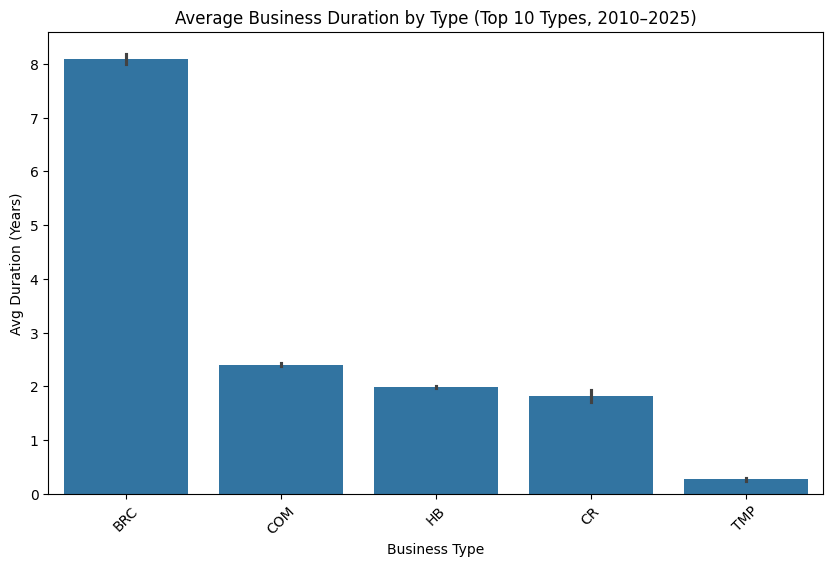

In [28]:
# Static version: Average duration by type
plt.figure(figsize=(10, 6))
sns.barplot(data=df_type_filtered, x='TYPEABBREVIATION', y='DURATION_YEARS',
            order=df_type_filtered.groupby('TYPEABBREVIATION')['DURATION_YEARS'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title('Average Business Duration by Type (Top 10 Types, 2010–2025)')
plt.xlabel('Business Type')
plt.ylabel('Avg Duration (Years)')
plt.show()

# Interactive version
avg_type_duration = (
    df_type_filtered.groupby('TYPEABBREVIATION')['DURATION_YEARS']
    .mean()
    .reset_index()
    .sort_values('DURATION_YEARS', ascending=False)
)
fig = px.bar(avg_type_duration,
             x='TYPEABBREVIATION', y='DURATION_YEARS',
             text_auto='.2f',
             title='Average Business Duration by Type (Top 10 Types, 2010–2025)',
             labels={'DURATION_YEARS': 'Avg Duration (Years)', 'TYPEABBREVIATION': 'Business Type'},
             color='DURATION_YEARS')
fig.update_layout(xaxis_tickangle=45)
fig.show()


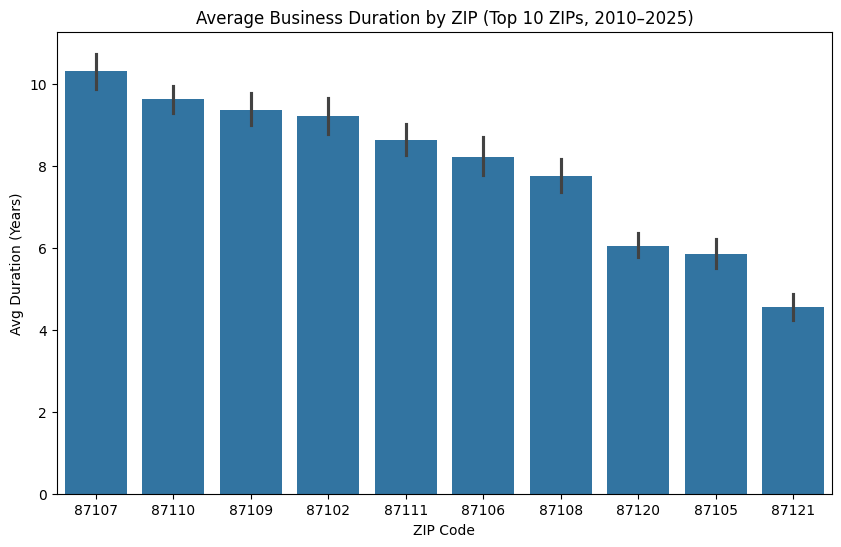

In [29]:
# Static version: Average duration by ZIP
plt.figure(figsize=(10, 6))
sns.barplot(data=df_zip_filtered, x='ZIP', y='DURATION_YEARS',
            order=df_zip_filtered.groupby('ZIP')['DURATION_YEARS'].mean().sort_values(ascending=False).index)
plt.title('Average Business Duration by ZIP (Top 10 ZIPs, 2010–2025)')
plt.xlabel('ZIP Code')
plt.ylabel('Avg Duration (Years)')
plt.show()

# Interactive version
avg_zip_duration = (
    df_zip_filtered.groupby('ZIP')['DURATION_YEARS']
    .mean()
    .reset_index()
    .sort_values('DURATION_YEARS', ascending=False)
)
fig = px.bar(avg_zip_duration,
             x='ZIP', y='DURATION_YEARS',
             text_auto='.2f',
             title='Average Business Duration by ZIP (Top 10 ZIPs, 2010–2025)',
             labels={'DURATION_YEARS': 'Avg Duration (Years)', 'ZIP': 'ZIP Code'},
             color='DURATION_YEARS')
fig.show()


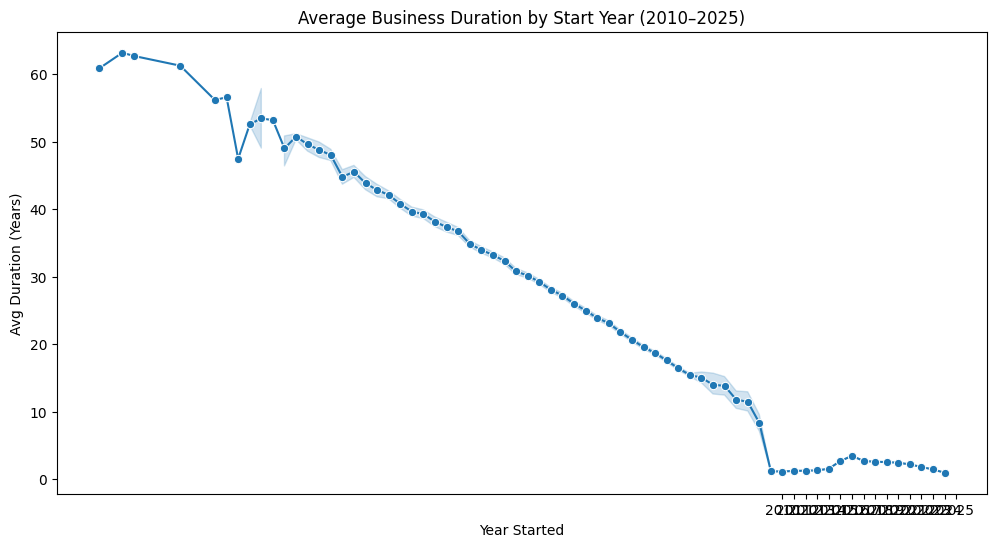

In [31]:
# Add YEAR column for ORIGINALISSUEDATE
df_window['YEAR'] = df_window['ORIGNALISSUEDATE'].dt.year

# Static version: Average duration by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_window, x='YEAR', y='DURATION_YEARS', marker='o')
plt.title('Average Business Duration by Start Year (2010–2025)')
plt.xlabel('Year Started')
plt.ylabel('Avg Duration (Years)')
plt.xticks(range(2010, 2026))
plt.show()

# Interactive version
avg_year_duration = (
    df_window.groupby('YEAR')['DURATION_YEARS']
    .mean()
    .reset_index()
    .sort_values('YEAR')
)
fig = px.line(avg_year_duration,
              x='YEAR', y='DURATION_YEARS',
              markers=True,
              title='Average Business Duration by Start Year (2010–2025)',
              labels={'DURATION_YEARS': 'Avg Duration (Years)', 'YEAR': 'Start Year'})
fig.update_xaxes(dtick=1)
fig.show()


In [33]:
# Expand dataset for each active year between ORIGNALISSUEDATE and EXPIRATIONDATE
expanded_rows = []
for _, row in df_window.iterrows():
    start_year = max(row['ORIGNALISSUEDATE'].year, 2010)
    end_year = min(row['EXPIRATIONDATE'].year if pd.notnull(row['EXPIRATIONDATE']) else 2025, 2025)
    for year in range(start_year, end_year + 1):
        expanded_rows.append({
            'YEAR': year,
            'ZIP': row['ZIP'],
            'TYPEABBREVIATION': row['TYPEABBREVIATION']
        })

df_active = pd.DataFrame(expanded_rows)

# Get top ZIPs and types for filtering
top_zips = df_active['ZIP'].value_counts().head(10).index
top_types_5 = df_active['TYPEABBREVIATION'].value_counts().head(5).index
top_types_10 = df_active['TYPEABBREVIATION'].value_counts().head(10).index


In [35]:
#Interactive Grouped Bars by ZIP
import plotly.express as px

df_plot = (
    df_active[df_active['ZIP'].isin(top_zips) & df_active['TYPEABBREVIATION'].isin(top_types_5)]
    .groupby(['YEAR', 'ZIP', 'TYPEABBREVIATION'])
    .size()
    .reset_index(name='COUNT')
)

fig = px.bar(df_plot, x="YEAR", y="COUNT", color="TYPEABBREVIATION", facet_col="ZIP", facet_col_wrap=5,
             title="Active Businesses by Year, ZIP, and Type (Top 10 ZIPs, Top 5 Types)",
             labels={"COUNT": "Business Count", "YEAR": "Year", "TYPEABBREVIATION": "Type"})
fig.update_xaxes(type='category')
fig.show()

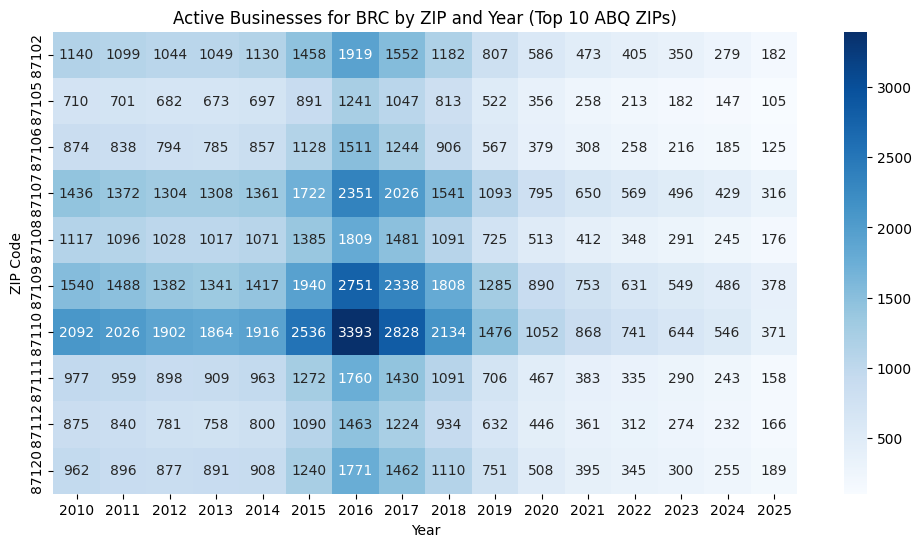

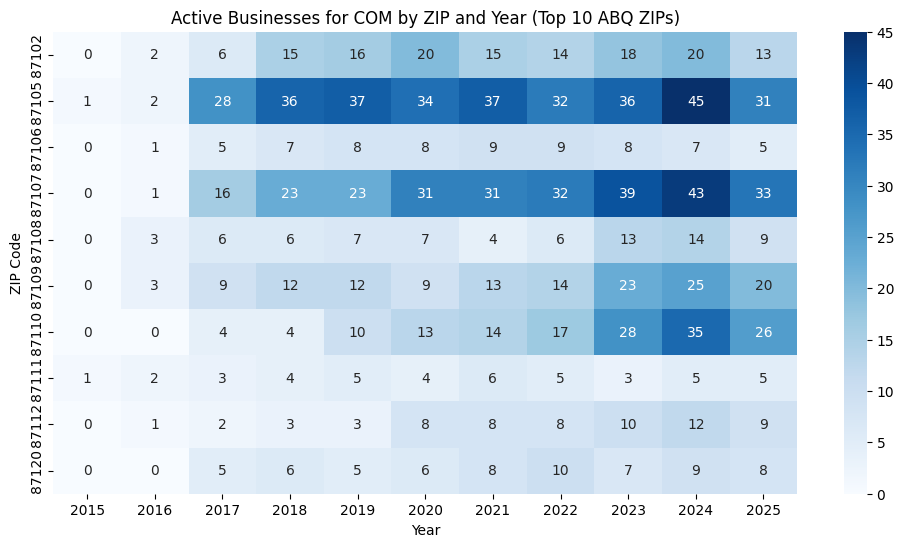

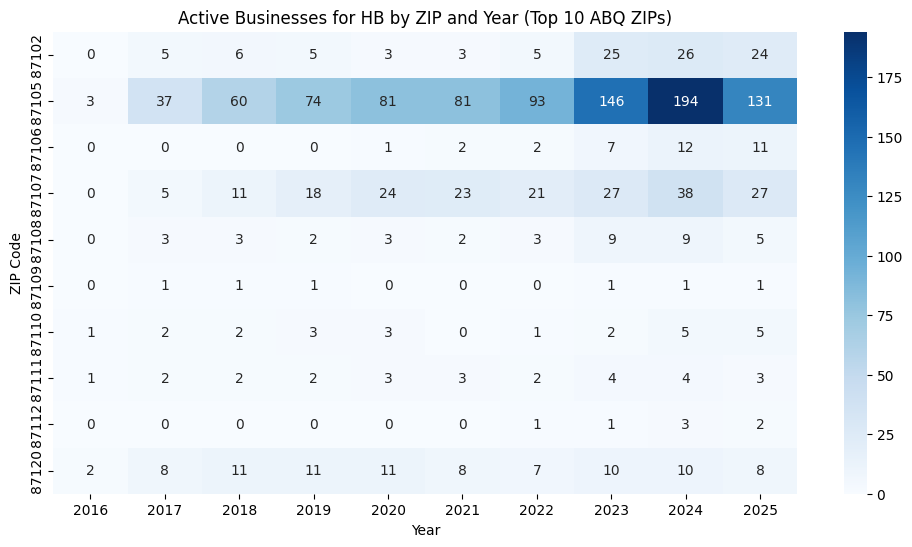

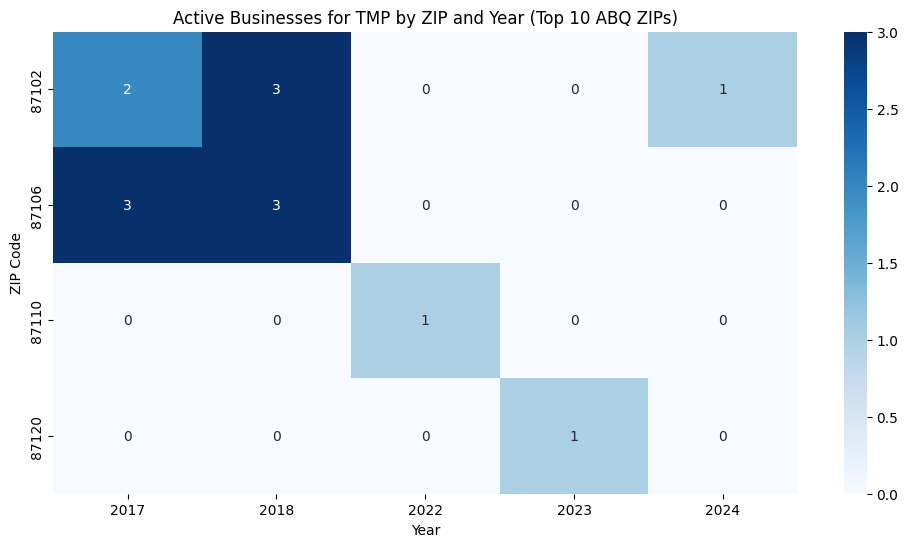

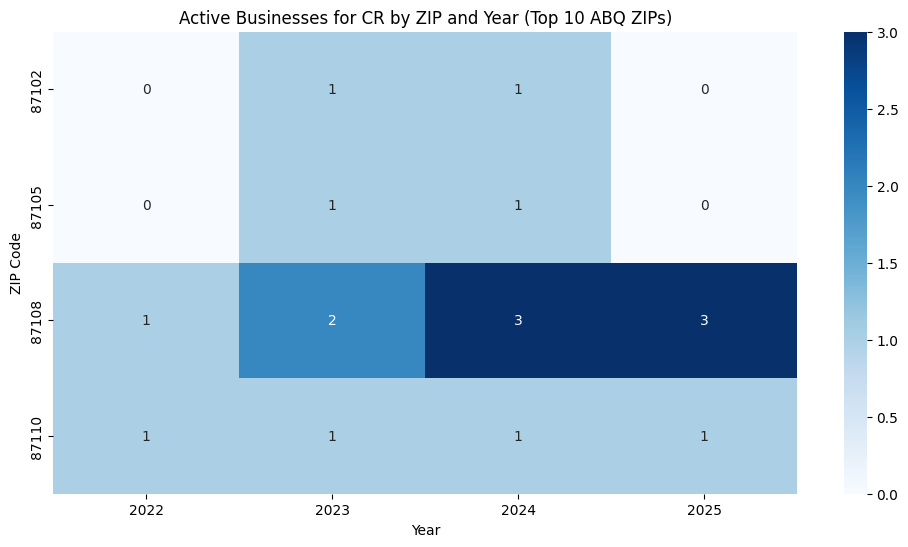

In [40]:
#Heatmap View
for t in top_types_5:
    df_heat = (
        df_active[
            (df_active['TYPEABBREVIATION'] == t) &
            (df_active['ZIP'].isin(top_zips))  # ✅ Filter for top ABQ ZIPs only
        ]
        .groupby(['ZIP', 'YEAR'])
        .size()
        .unstack(fill_value=0)
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(df_heat, cmap="Blues", annot=True, fmt="d")
    plt.title(f"Active Businesses for {t} by ZIP and Year (Top 10 ABQ ZIPs)")
    plt.xlabel("Year")
    plt.ylabel("ZIP Code")
    plt.show()


In [39]:
#All Types in One Interactive Bubble Chart
df_plot = (
    df_active[df_active['ZIP'].isin(top_zips) & df_active['TYPEABBREVIATION'].isin(top_types_10)]
    .groupby(['YEAR', 'ZIP', 'TYPEABBREVIATION'])
    .size()
    .reset_index(name='COUNT')
)

fig = px.scatter(df_plot, x="YEAR", y="ZIP", size="COUNT", color="TYPEABBREVIATION",
                 title="Active Businesses by Year, ZIP, and Type (Bubble Size = Count)",
                 labels={"COUNT": "Business Count", "YEAR": "Year", "ZIP": "ZIP Code"})
fig.update_xaxes(dtick=1)
fig.show()